In [1]:
%matplotlib notebook
import numpy as np
import pylab as plt
from escape.parse import swissfel as sf
#from lmfit import models

In [2]:
ch_P133 = {'ch4':'SLAAR21-LSCP1-FNS:CH4:VAL_GET', 'ch5':'SLAAR21-LSCP1-FNS:CH5:VAL_GET',
         'ch6':'SLAAR21-LSCP1-FNS:CH6:VAL_GET', 'ch7':'SLAAR21-LSCP1-FNS:CH7:VAL_GET'}

coef_P133 = {'ch4':0.00164477060205,   'ch5':0.00139197143127,
             'ch6':0.000637841358229,  'ch7':0.000583122981085}

In [3]:
#xcal_f = '/sf/bernina/data/p17592/res/scan_info/calib_monOpt_x_diode_scan_info.json' # this is an example from swissMX commissioning
xcal_f = '/sf/bernina/data/p17743/res/scan_info/run0001_PBPB133_calib_monOpt_x_diode.json'#p16584/res/scan_info/run0042_PBPB133_calib_monOpt_x_diode.json' 
ycal_f = '/sf/bernina/data/p17743/res/scan_info/run0002_PBPB133_calib_monOpt_y_diode.json'#'/sf/bernina/data/p16584/res/scan_info/run0043_PBPB133_calib_monOpt_y_diode.json'

x_pos = np.squeeze(sf.readScanEcoJson_v01(xcal_f)[0]['scan_values'])
y_pos = np.squeeze(sf.readScanEcoJson_v01(ycal_f)[0]['scan_values'])

x_data = sf.parseScanEco_v01(xcal_f,createEscArrays=True, memlimit_mD_MB=50)
y_data = sf.parseScanEco_v01(ycal_f,createEscArrays=True, memlimit_mD_MB=50)

Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 0
Found empty dataset in SARES20-PROF142-M3:FPICTURE in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 1
Found empty dataset in SARES20-PROF142-M3:FPICTURE in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 2
Found empty dataset in SARES20-PROF142-M3:FPICTURE in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 3
Found em

Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 0
Found empty dataset in SARES20-PROF142-M3:FPICTURE in cycle 0
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 1
Found empty dataset in SARES20-PROF142-M3:FPICTURE in cycle 1
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH4:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH5:2 in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH7:2 in cycle 2
Found empty dataset in SARES20-PROF142-M3:FPICTURE in cycle 2
Found empty dataset in SLAAR21-LSCP1-LAS6991:CH6:2 in cycle 3
Found em

In [4]:
def get_channelData(data,channels):
    rd = {}
    evId = data[channels['ch4']].eventIds
    for k in (list(channels.keys())):
        rd[k] = np.squeeze(data[channels[k]].data)
    rd.update({'evId':evId})
    return rd

def pos_P133(rd,coef):
    pos={'x':[],'y':[]}
    for p in ['x','y']:
        if p == 'x': 
            a = 'ch4' ; b = 'ch5'
        elif p =='y':
            a = 'ch6' ; b = 'ch7'
        diff = (rd[a]*coef[a]) - (rd[b]*coef[b])
        sums = (rd[a]*coef[a]) + (rd[b]*coef[b])
        pos[p] = diff/sums
    return pos

def calib_P133(data,coef,motor_pos):
    rd = {'ch4':[] , 'ch5':[], 'ch6':[], 'ch7':[]}
    for i in range(len(motor_pos)):
        for j in list(ch_P133.keys()):
            d = np.squeeze(data[ch_P133[j]].get_step_data(i).compute())
            rd[j].append(np.nanmean(d))
    for j in list(ch_P133.keys()):
        rd[j] = np.array(rd[j])   
    rd.update({'pos':motor_pos})
    pos = pos_P133(rd,coef)
    return pos


In [5]:
x_cal = calib_P133(x_data,coef_P133,x_pos)

In [6]:
d=get_channelData(x_data,ch_P133)

<IPython.core.display.Javascript object>


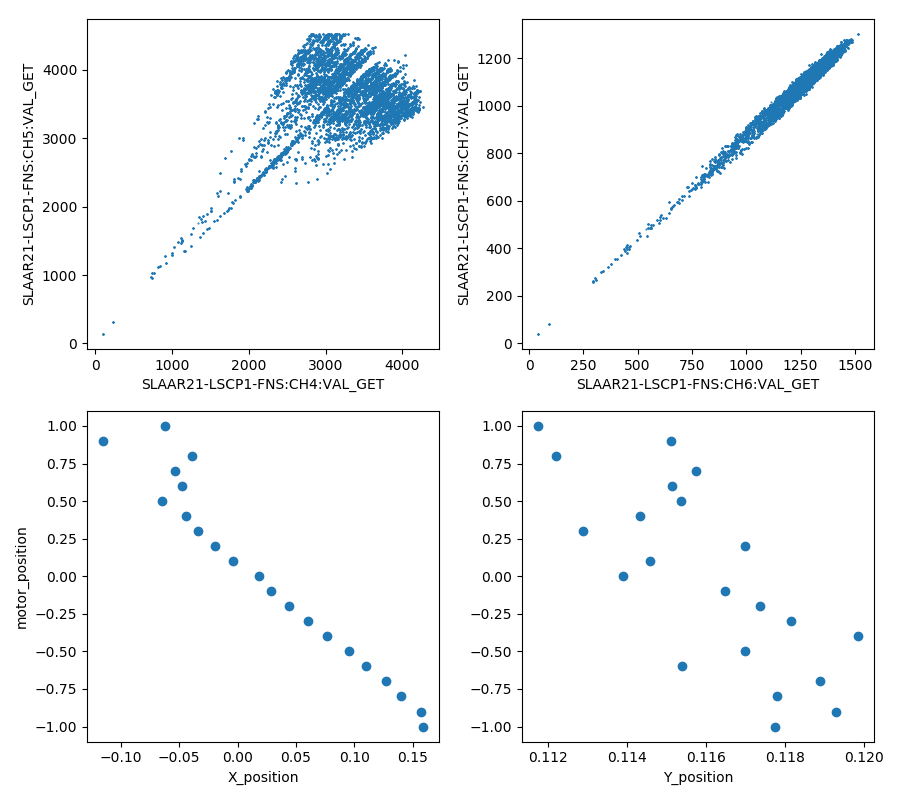

/sf/bernina/anaconda/4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [7]:
f,ax = plt.subplots(2,2,num='PBPS133_Xcalibration',  figsize=(9,8))
#mod=models.PolynomialModel(1) 
ax[0,0].plot(d['ch4'].compute(),d['ch5'].compute(),'.',ms=1)
ax[0,0].set_xlabel(ch_P133['ch4']); ax[0,0].set_ylabel(ch_P133['ch5'])

ax[0,1].plot(d['ch6'].compute(),d['ch7'].compute(),'.',ms=1)
ax[0,1].set_xlabel(ch_P133['ch6']); ax[0,1].set_ylabel(ch_P133['ch7'])

ax[1,0].plot( x_cal['x'],x_pos,'o')
#p_x = mod.guess(x=x_cal['x'], data=x_pos)
#out=mod.fit(x_pos,p_x, x=x_cal['x'])

#ax[1,0].plot(x_cal['x'],out.best_fit,'r-',label=' y = a + b.x \n a = {} +/- {} \n b = {} +/- {}'.format(
#                                        "%.6f" %out.params['c0'].value, "%.6f" %out.params['c0'].stderr,
#                                        "%.6f" %out.params['c1'].value, "%.6f" %out.params['c1'].stderr))
ax[1,0].set_ylabel('motor_position'); ax[1,0].legend()
ax[1,0].set_xlabel('X_position')
ax[1,1].plot( x_cal['y'],x_pos,'o')
#p_y = mod.guess(x=x_cal['y'], data=x_pos)
#out=mod.fit(x_pos,p_y, x=x_cal['y'])

#ax[1,1].plot(x_cal['y'],out.best_fit,'r-',label=' y = a + b.x \n a = {} +/- {} \n b = {} +/- {}'.format(
#                                        "%.6f" %out.params['c0'].value, "%.6f" %out.params['c0'].stderr,
#                                        "%.6f" %out.params['c1'].value, "%.6f" %out.params['c1'].stderr))
ax[1,1].set_xlabel('Y_position'); ax[1,1].legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


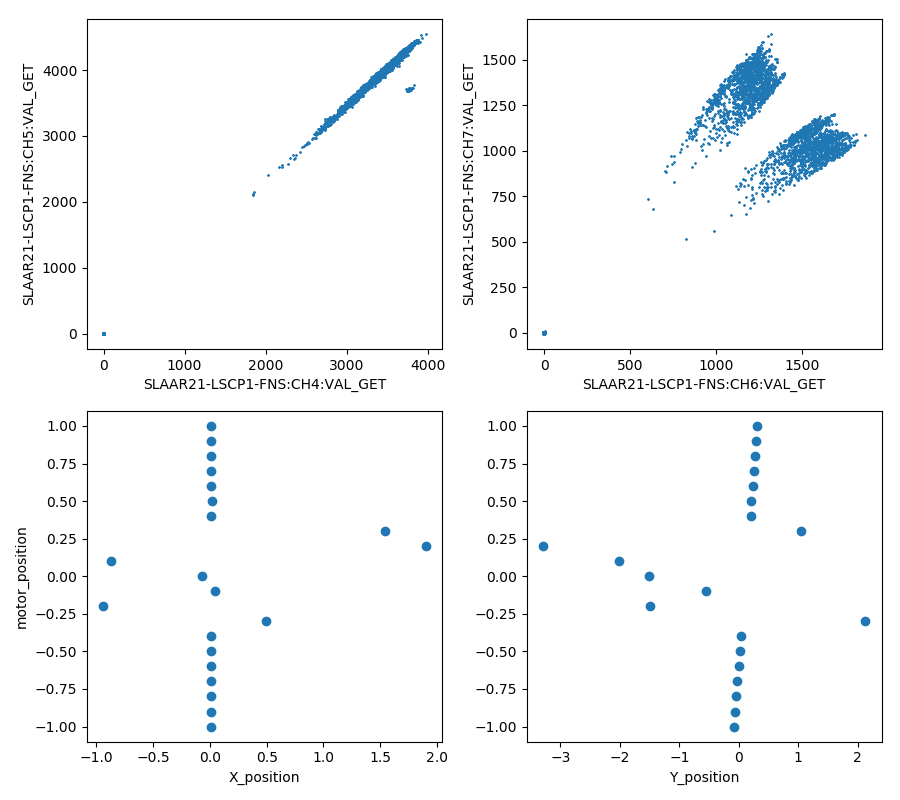

/sf/bernina/anaconda/4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [9]:
x_cal = calib_P133(y_data,coef_P133,y_pos)
d=get_channelData(y_data,ch_P133)
f,ax = plt.subplots(2,2,num='PBPS133_Ycalibration',  figsize=(9,8))
#mod=models.PolynomialModel(1) 
ax[0,0].plot(d['ch4'].compute(),d['ch5'].compute(),'.',ms=1)
ax[0,0].set_xlabel(ch_P133['ch4']); ax[0,0].set_ylabel(ch_P133['ch5'])

ax[0,1].plot(d['ch6'].compute(),d['ch7'].compute(),'.',ms=1)
ax[0,1].set_xlabel(ch_P133['ch6']); ax[0,1].set_ylabel(ch_P133['ch7'])

ax[1,0].plot( x_cal['x'],y_pos,'o')
#p_x = mod.guess(x=x_cal['x'], data=y_pos)
#out=mod.fit(y_pos,p_x, x=x_cal['x'])

#ax[1,0].plot(x_cal['x'],out.best_fit,'r-',label=' y = a + b.x \n a = {} +/- {} \n b = {} +/- {}'.format(
#                                        "%.6f" %out.params['c0'].value, "%.6f" %out.params['c0'].stderr,
#                                        "%.6f" %out.params['c1'].value, "%.6f" %out.params['c1'].stderr))
ax[1,0].set_ylabel('motor_position'); ax[1,0].legend()
ax[1,0].set_xlabel('X_position')
ax[1,1].plot( x_cal['y'],x_pos,'o')
#p_y = mod.guess(x=x_cal['y'], data=x_pos)
#out=mod.fit(x_pos,p_y, x=x_cal['y'])

#ax[1,1].plot(x_cal['y'],out.best_fit,'r-',label=' y = a + b.x \n a = {} +/- {} \n b = {} +/- {}'.format(
#                                        "%.6f" %out.params['c0'].value, "%.6f" %out.params['c0'].stderr,
#                                        "%.6f" %out.params['c1'].value, "%.6f" %out.params['c1'].stderr))
ax[1,1].set_xlabel('Y_position'); ax[1,1].legend()
plt.tight_layout()